In [36]:
import pandas as pd 
import numpy as np

import json

def file_to_df(file_path):
    file_path = file_path
    with open(file_path,'r')as f:
        data = json.load(f)
    df = pd.DataFrame(data['data'])
    return df

level2_deep5_filepath = '/root/trading_systems/kucoin_dir/kucoin_release_data_initial/2024-12-02_10-00_QUILL/QUILL_level2Depth5_data.json'

df_deep5 =file_to_df(level2_deep5_filepath)
df_deep5 

asks  \
0     [[0.7333, 146.95], [0.7778, 173.97], [0.8222, ...   
1     [[0.7333, 146.95], [0.7778, 173.97], [0.8222, ...   
2     [[1.3143, 372.44], [1.3429, 448.62], [1.3714, ...   
3     [[1.3143, 372.44], [1.3429, 448.62], [1.3714, ...   
4     [[1.55, 58.1], [1.575, 475.31], [1.6, 536.34],...   
...                                                 ...   
6029  [[1.3837, 212.68], [1.3846, 15.92], [1.3847, 1...   
6030  [[1.3837, 212.68], [1.3846, 15.92], [1.3847, 1...   
6031  [[1.3837, 212.68], [1.3846, 15.92], [1.3847, 1...   
6032  [[1.3837, 212.68], [1.3846, 15.92], [1.3847, 1...   
6033  [[1.3837, 212.68], [1.3846, 15.92], [1.3847, 1...   

                                                   bids      timestamp  \
0     [[0.65, 700], [0.6, 4018.77], [0.5955, 183.22]...  1733133600085   
1     [[0.65, 700], [0.6, 4018.77], [0.5955, 183.22]...  1733133600114   
2     [[1.1, 1080], [0.7, 22500], [0.65, 3500], [0.6...  1733133600172   
3     [[1.1, 1080], [1, 900], [0.9077, 1], [0.72, 13...  1733133600277   
4     [[1.5, 5253], [1.2229, 1], [1.1, 1080], [1, 38...  1733133600388   
...                                                 ...            ...   
6029  [[1.3825, 1.44], [1.365, 132.75], [1.3586, 227...  1733134798148   
6030  [[1.3825, 1.44], [1.365, 132.75], [1.353, 1.31...  1733134798246   
6031  [[1.3825, 1.44], [1.365, 132.75], [1.353, 1.31...  1733134798568   
6032  [[1.3825, 1.44], [1.365, 132.75], [1.354, 18.4...  1733134798986   
6033  [[1.3825, 1.44], [1.365, 132.75], [1.354, 18.4...  1733134799294   

      time_received  
0     10:00:00.1236  
1     10:00:00.1495  
2     10:00:00.2074  
3     10:00:00.3132  
4     10:00:00.4236  
...             ...  
6029  10:19:58.1872  
6030  10:19:58.2830  
6031  10:19:58.6054  
6032  10:19:59.0234  
6033  10:19:59.3300  

[6034 rows x 4 columns]

In [37]:

def extract_top_bids_asks(df):
    # Create a copy to avoid modifying the original DataFrame
    df = df.copy()
    
    def process_list_column(column):
        # Handle different potential input formats
        def process_row(row):
            if isinstance(row, list) and all(isinstance(item, list) for item in row):
                return sorted(row, key=lambda x: x[0])
            return row
        
        return column.apply(process_row)
    
    # Sort asks (ascending) and bids (descending)
    df['sorted_asks'] = process_list_column(df['asks'])
    df['sorted_bids'] = df['bids'].apply(lambda x: sorted(x, key=lambda item: item[0], reverse=True))
    
    # Extract top 5 asks and bids
    for side, sorted_col in [('ask', 'sorted_asks'), ('bid', 'sorted_bids')]:
        for rank in range(5):
            # Price column
            df[f'{side}_price_{rank+1}'] = df[sorted_col].apply(
                lambda x: x[rank][0] if len(x) > rank else np.nan
            )
            
            # Size column
            df[f'{side}_size_{rank+1}'] = df[sorted_col].apply(
                lambda x: x[rank][1] if len(x) > rank else np.nan
            )
    
    # Drop temporary sorting columns
    df = df.drop(columns=['sorted_asks', 'sorted_bids','bids','asks'])
    
    return df


df_all_bidask = extract_top_bids_asks(df_deep5.copy())
df_all_bidask

timestamp  time_received ask_price_1 ask_size_1 ask_price_2  \
0     1733133600085  10:00:00.1236      0.7333     146.95      0.7778   
1     1733133600114  10:00:00.1495      0.7333     146.95      0.7778   
2     1733133600172  10:00:00.2074      1.3143     372.44      1.3429   
3     1733133600277  10:00:00.3132      1.3143     372.44      1.3429   
4     1733133600388  10:00:00.4236        1.55       58.1       1.575   
...             ...            ...         ...        ...         ...   
6029  1733134798148  10:19:58.1872      1.3837     212.68      1.3846   
6030  1733134798246  10:19:58.2830      1.3837     212.68      1.3846   
6031  1733134798568  10:19:58.6054      1.3837     212.68      1.3846   
6032  1733134798986  10:19:59.0234      1.3837     212.68      1.3846   
6033  1733134799294  10:19:59.3300      1.3837     212.68      1.3846   

     ask_size_2 ask_price_3 ask_size_3 ask_price_4 ask_size_4  ...  \
0        173.97      0.8222     222.72      0.8667     259.06  ...   
1        173.97      0.8222     222.72      0.8667     259.06  ...   
2        448.62      1.3714     480.95         1.4     554.44  ...   
3        448.62      1.3714     480.95         1.4     554.44  ...   
4        475.31         1.6     536.34       1.625     604.89  ...   
...         ...         ...        ...         ...        ...  ...   
6029      15.92      1.3847       1.33      1.3848     174.45  ...   
6030      15.92      1.3847       1.33      1.3848     174.45  ...   
6031      15.92      1.3847       1.33      1.3848     174.45  ...   
6032      15.92      1.3847       1.33      1.3848     174.45  ...   
6033      15.92      1.3847       1.33      1.3848     174.45  ...   

     bid_price_1 bid_size_1 bid_price_2 bid_size_2 bid_price_3 bid_size_3  \
0           0.65        700         0.6    4018.77      0.5955     183.22   
1           0.65        700         0.6    4018.77      0.5955     183.22   
2            1.1       1080         0.7      22500        0.65       3500   
3            1.1       1080           1        900      0.9077          1   
4            1.5       5253      1.2229          1         1.1       1080   
...          ...        ...         ...        ...         ...        ...   
6029      1.3825       1.44       1.365     132.75      1.3586     227.26   
6030      1.3825       1.44       1.365     132.75       1.353       1.31   
6031      1.3825       1.44       1.365     132.75       1.353       1.31   
6032      1.3825       1.44       1.365     132.75       1.354      18.46   
6033      1.3825       1.44       1.365     132.75       1.354      18.46   

     bid_price_4 bid_size_4 bid_price_5 bid_size_5  
0         0.5909     308.49      0.5864     479.45  
1         0.5909     308.49      0.5864     479.45  
2            0.6   13668.77      0.5955     183.22  
3           0.72      13610         0.7      22500  
4              1       3800      0.9804          1  
...          ...        ...         ...        ...  
6029       1.353       1.31      1.3513       1.57  
6030      1.3513       1.57      1.3501      31.03  
6031      1.3513       1.57      1.3501      31.03  
6032       1.353       1.31      1.3513       1.57  
6033       1.353       1.31      1.3513       1.57  

[6034 rows x 22 columns]

In [32]:
import numpy as np
import pandas as pd

def calculate_order_book_imbalance_vectorized(df):
    """
    Robust vectorized calculation of market order book imbalance.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing order book data with bid and ask prices/sizes
    
    Returns:
    --------
    pandas.DataFrame
        Original DataFrame with added order book imbalance column
    """
    # Number of bid and ask levels to consider
    num_levels = 2
    
    # Create weight arrays for bid and ask levels using NumPy
    weights = np.linspace(1, 0.9, num_levels)
    
    # Ensure numeric types
    bid_size_columns = [f'bid_size_{i}' for i in range(1, num_levels + 1)]
    ask_size_columns = [f'ask_size_{i}' for i in range(1, num_levels + 1)]
    
    # Convert to numeric, replacing any non-numeric values with 0
    bid_sizes = df[bid_size_columns].apply(pd.to_numeric, errors='coerce').fillna(0).values
    ask_sizes = df[ask_size_columns].apply(pd.to_numeric, errors='coerce').fillna(0).values
    
    # Ensure bid_sizes and ask_sizes are float type
    bid_sizes = bid_sizes.astype(float)
    ask_sizes = ask_sizes.astype(float)
    
    # Compute weighted bids and asks using NumPy broadcasting
    weighted_bids = np.sum(bid_sizes * weights, axis=1)
    weighted_asks = np.sum(ask_sizes * weights, axis=1)
    
    # Compute imbalance with vectorized operations and handling division by zero
    imbalance = np.where(
        weighted_bids + weighted_asks > 0,
        weighted_bids / (weighted_bids + weighted_asks),
        np.nan
    )
    
    # Create a copy of the input DataFrame and add imbalance column
    result_df = df.copy()
    result_df['order_book_imbalance'] = imbalance
    
    return result_df

result_df1 = calculate_order_book_imbalance_vectorized(result_df)

result_df1
# Recommended usage in Jupyter Notebook
# 1. First, run validate_and_debug_imbalance_calculation(df)
# 2. If issues are found, clean your data accordingly
# 3. Then run the main calculation

timestamp  time_received ask_price_1 ask_size_1 ask_price_2  \
0     1733133600085  10:00:00.1236      0.7333     146.95      0.7778   
1     1733133600114  10:00:00.1495      0.7333     146.95      0.7778   
2     1733133600172  10:00:00.2074      1.3143     372.44      1.3429   
3     1733133600277  10:00:00.3132      1.3143     372.44      1.3429   
4     1733133600388  10:00:00.4236        1.55       58.1       1.575   
...             ...            ...         ...        ...         ...   
6029  1733134798148  10:19:58.1872      1.3837     212.68      1.3846   
6030  1733134798246  10:19:58.2830      1.3837     212.68      1.3846   
6031  1733134798568  10:19:58.6054      1.3837     212.68      1.3846   
6032  1733134798986  10:19:59.0234      1.3837     212.68      1.3846   
6033  1733134799294  10:19:59.3300      1.3837     212.68      1.3846   

     ask_size_2 ask_price_3 ask_size_3 ask_price_4 ask_size_4  ... bid_size_1  \
0        173.97      0.8222     222.72      0.8667     259.06  ...        700   
1        173.97      0.8222     222.72      0.8667     259.06  ...        700   
2        448.62      1.3714     480.95         1.4     554.44  ...       1080   
3        448.62      1.3714     480.95         1.4     554.44  ...       1080   
4        475.31         1.6     536.34       1.625     604.89  ...       5253   
...         ...         ...        ...         ...        ...  ...        ...   
6029      15.92      1.3847       1.33      1.3848     174.45  ...       1.44   
6030      15.92      1.3847       1.33      1.3848     174.45  ...       1.44   
6031      15.92      1.3847       1.33      1.3848     174.45  ...       1.44   
6032      15.92      1.3847       1.33      1.3848     174.45  ...       1.44   
6033      15.92      1.3847       1.33      1.3848     174.45  ...       1.44   

     bid_price_2 bid_size_2 bid_price_3 bid_size_3 bid_price_4 bid_size_4  \
0            0.6    4018.77      0.5955     183.22      0.5909     308.49   
1            0.6    4018.77      0.5955     183.22      0.5909     308.49   
2            0.7      22500        0.65       3500         0.6   13668.77   
3              1        900      0.9077          1        0.72      13610   
4         1.2229          1         1.1       1080           1       3800   
...          ...        ...         ...        ...         ...        ...   
6029       1.365     132.75      1.3586     227.26       1.353       1.31   
6030       1.365     132.75       1.353       1.31      1.3513       1.57   
6031       1.365     132.75       1.353       1.31      1.3513       1.57   
6032       1.365     132.75       1.354      18.46       1.353       1.31   
6033       1.365     132.75       1.354      18.46       1.353       1.31   

     bid_price_5 bid_size_5 order_book_imbalance  
0         0.5864     479.45             0.934308  
1         0.5864     479.45             0.934308  
2         0.5955     183.22             0.964888  
3            0.7      22500             0.708875  
4         0.9804          1             0.915349  
...          ...        ...                  ...  
6029      1.3513       1.57             0.347534  
6030      1.3501      31.03             0.347534  
6031      1.3501      31.03             0.347534  
6032      1.3513       1.57             0.347534  
6033      1.3513       1.57             0.347534  

[6034 rows x 23 columns]

In [33]:
import pandas as pd
import numpy as np

# Assuming result_df1 is your DataFrame
columns_to_convert = [
    'ask_price_1', 'ask_size_1', 'ask_price_2', 'ask_size_2', 'ask_price_3', 'ask_size_3', 'ask_price_4', 'ask_size_4','ask_price_5', 'ask_size_5',
    'bid_price_1', 'bid_size_1', 'bid_price_2', 'bid_size_2', 'bid_price_3', 'bid_size_3', 'bid_price_4', 'bid_size_4',
    'bid_price_5', 'bid_size_5'
]

def convert_to_float(df, columns):
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

result_df1 = convert_to_float(result_df1, columns_to_convert)
# Convert the 'time_received' column to datetime
result_df1['time_received'] = pd.to_datetime(result_df1['time_received'], errors='coerce')
#result_df1.info()
result_df1

/tmp/ipykernel_1505165/3104184650.py:18: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



timestamp              time_received  ask_price_1  ask_size_1  \
0     1733133600085 2024-12-05 10:00:00.123600       0.7333      146.95   
1     1733133600114 2024-12-05 10:00:00.149500       0.7333      146.95   
2     1733133600172 2024-12-05 10:00:00.207400       1.3143      372.44   
3     1733133600277 2024-12-05 10:00:00.313200       1.3143      372.44   
4     1733133600388 2024-12-05 10:00:00.423600       1.5500       58.10   
...             ...                        ...          ...         ...   
6029  1733134798148 2024-12-05 10:19:58.187200       1.3837      212.68   
6030  1733134798246 2024-12-05 10:19:58.283000       1.3837      212.68   
6031  1733134798568 2024-12-05 10:19:58.605400       1.3837      212.68   
6032  1733134798986 2024-12-05 10:19:59.023400       1.3837      212.68   
6033  1733134799294 2024-12-05 10:19:59.330000       1.3837      212.68   

      ask_price_2  ask_size_2  ask_price_3  ask_size_3  ask_price_4  \
0          0.7778      173.97       0.8222      222.72       0.8667   
1          0.7778      173.97       0.8222      222.72       0.8667   
2          1.3429      448.62       1.3714      480.95       1.4000   
3          1.3429      448.62       1.3714      480.95       1.4000   
4          1.5750      475.31       1.6000      536.34       1.6250   
...           ...         ...          ...         ...          ...   
6029       1.3846       15.92       1.3847        1.33       1.3848   
6030       1.3846       15.92       1.3847        1.33       1.3848   
6031       1.3846       15.92       1.3847        1.33       1.3848   
6032       1.3846       15.92       1.3847        1.33       1.3848   
6033       1.3846       15.92       1.3847        1.33       1.3848   

      ask_size_4  ...  bid_size_1  bid_price_2  bid_size_2  bid_price_3  \
0         259.06  ...      700.00       0.6000     4018.77       0.5955   
1         259.06  ...      700.00       0.6000     4018.77       0.5955   
2         554.44  ...     1080.00       0.7000    22500.00       0.6500   
3         554.44  ...     1080.00       1.0000      900.00       0.9077   
4         604.89  ...     5253.00       1.2229        1.00       1.1000   
...          ...  ...         ...          ...         ...          ...   
6029      174.45  ...        1.44       1.3650      132.75       1.3586   
6030      174.45  ...        1.44       1.3650      132.75       1.3530   
6031      174.45  ...        1.44       1.3650      132.75       1.3530   
6032      174.45  ...        1.44       1.3650      132.75       1.3540   
6033      174.45  ...        1.44       1.3650      132.75       1.3540   

      bid_size_3  bid_price_4  bid_size_4  bid_price_5  bid_size_5  \
0         183.22       0.5909      308.49       0.5864      479.45   
1         183.22       0.5909      308.49       0.5864      479.45   
2        3500.00       0.6000    13668.77       0.5955      183.22   
3           1.00       0.7200    13610.00       0.7000    22500.00   
4        1080.00       1.0000     3800.00       0.9804        1.00   
...          ...          ...         ...          ...         ...   
6029      227.26       1.3530        1.31       1.3513        1.57   
6030        1.31       1.3513        1.57       1.3501       31.03   
6031        1.31       1.3513        1.57       1.3501       31.03   
6032       18.46       1.3530        1.31       1.3513        1.57   
6033       18.46       1.3530        1.31       1.3513        1.57   

      order_book_imbalance  
0                 0.934308  
1                 0.934308  
2                 0.964888  
3                 0.708875  
4                 0.915349  
...                    ...  
6029              0.347534  
6030              0.347534  
6031              0.347534  
6032              0.347534  
6033              0.347534  

[6034 rows x 23 columns]

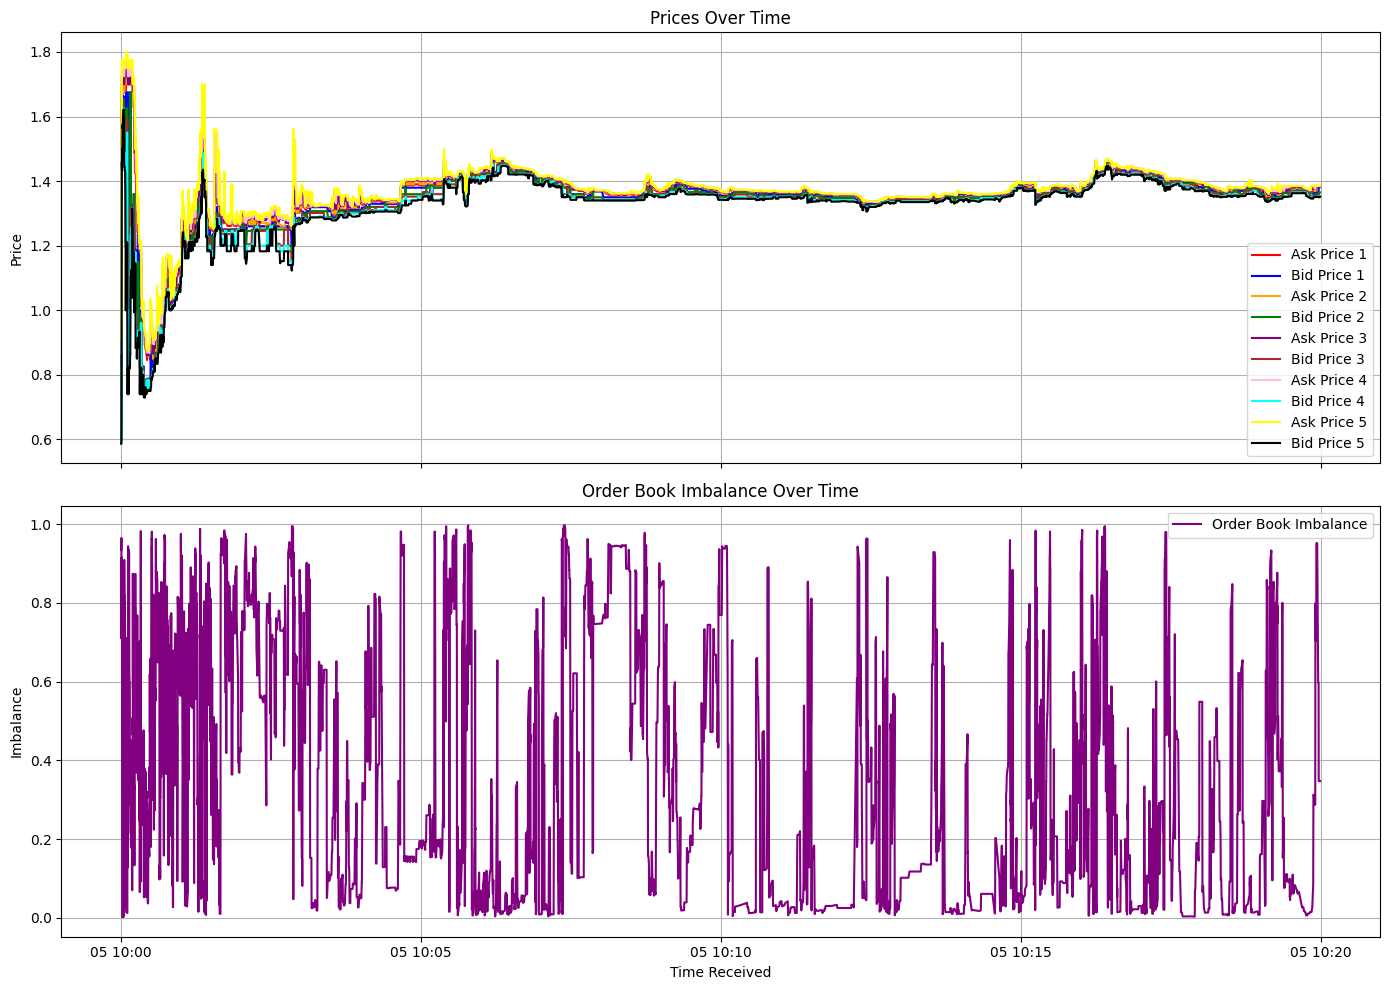

In [34]:
import matplotlib.pyplot as plt

# Create a figure with two subplots sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 10))

# Plot the price data on the first subplot
ax1.plot(result_df1['time_received'], result_df1['ask_price_1'],
         label='Ask Price 1', color='red')
ax1.plot(result_df1['time_received'], result_df1['bid_price_1'],
         label='Bid Price 1', color='blue')
ax1.plot(result_df1['time_received'], result_df1['ask_price_2'],
         label='Ask Price 2', color='orange')
ax1.plot(result_df1['time_received'], result_df1['bid_price_2'],
         label='Bid Price 2', color='green')
ax1.plot(result_df1['time_received'], result_df1['ask_price_3'],
         label='Ask Price 3', color='purple')
ax1.plot(result_df1['time_received'], result_df1['bid_price_3'],
         label='Bid Price 3', color='brown')
ax1.plot(result_df1['time_received'], result_df1['ask_price_4'],
         label='Ask Price 4', color='pink')
ax1.plot(result_df1['time_received'], result_df1['bid_price_4'],
         label='Bid Price 4', color='cyan')
ax1.plot(result_df1['time_received'], result_df1['ask_price_5'],
         label='Ask Price 5', color='yellow')
ax1.plot(result_df1['time_received'], result_df1['bid_price_5'],
         label='Bid Price 5', color='black')

ax1.set_ylabel('Price')
ax1.set_title('Prices Over Time')
ax1.legend()
ax1.grid(True)

# Plot the imbalance data on the second subplot
ax2.plot(result_df1['time_received'], result_df1['order_book_imbalance'],
         label='Order Book Imbalance', color='purple')

ax2.set_xlabel('Time Received')
ax2.set_ylabel('Imbalance')
ax2.set_title('Order Book Imbalance Over Time')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [35]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a figure with two subplots sharing x-axis
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    subplot_titles=('Prices Over Time', 'Order Book Imbalance Over Time'))

# Add price data to the first subplot
fig.add_trace(go.Scatter(x=result_df1['time_received'], y=result_df1['ask_price_1'],
                         mode='lines', name='Ask Price 1', line=dict(color='red')), row=1, col=1)
fig.add_trace(go.Scatter(x=result_df1['time_received'], y=result_df1['bid_price_1'],
                         mode='lines', name='Bid Price 1', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=result_df1['time_received'], y=result_df1['ask_price_2'],
                         mode='lines', name='Ask Price 2', line=dict(color='orange')), row=1, col=1)
fig.add_trace(go.Scatter(x=result_df1['time_received'], y=result_df1['bid_price_2'],
                         mode='lines', name='Bid Price 2', line=dict(color='green')), row=1, col=1)
fig.add_trace(go.Scatter(x=result_df1['time_received'], y=result_df1['ask_price_3'],
                         mode='lines', name='Ask Price 3', line=dict(color='purple')), row=1, col=1)
fig.add_trace(go.Scatter(x=result_df1['time_received'], y=result_df1['bid_price_3'],
                         mode='lines', name='Bid Price 3', line=dict(color='brown')), row=1, col=1)
fig.add_trace(go.Scatter(x=result_df1['time_received'], y=result_df1['ask_price_4'],
                         mode='lines', name='Ask Price 4', line=dict(color='pink')), row=1, col=1)
fig.add_trace(go.Scatter(x=result_df1['time_received'], y=result_df1['bid_price_4'],
                         mode='lines', name='Bid Price 4', line=dict(color='cyan')), row=1, col=1)
fig.add_trace(go.Scatter(x=result_df1['time_received'], y=result_df1['ask_price_5'],
                         mode='lines', name='Ask Price 5', line=dict(color='yellow')), row=1, col=1)
fig.add_trace(go.Scatter(x=result_df1['time_received'], y=result_df1['bid_price_5'],
                         mode='lines', name='Bid Price 5', line=dict(color='black')), row=1, col=1)

# Add imbalance data to the second subplot
fig.add_trace(go.Scatter(x=result_df1['time_received'], y=result_df1['order_book_imbalance'],
                         mode='lines', name='Order Book Imbalance', line=dict(color='purple')), row=2, col=1)

# Update layout with cursor line across both charts
fig.update_layout(
    height=800,
    width=1000,
    title_text='Prices and Order Book Imbalance Over Time',
    hovermode='x unified',
)

# Update x-axes to show spikelines
fig.update_xaxes(
    showspikes=True,
    spikemode='across',
    spikesnap='data',
    spikethickness=1,
    spikedash='solid',
    spikecolor='grey',
)

# Display the interactive plot
fig.show()